In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple

import corner

In [2]:
from starccato_flow.data.ccsn_snr_data import CCSNSNRData
from starccato_flow.data.toy_data import ToyData
from starccato_flow.training.trainer import Trainer
from starccato_flow.training.trainer_flow_matching import FlowMatchingTrainer

from starccato_flow.utils.defaults import TEN_KPC
from starccato_flow.plotting.plotting import plot_reconstruction_distribution, plot_candidate_signal, create_latent_morph_gif

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


MPS device found


/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

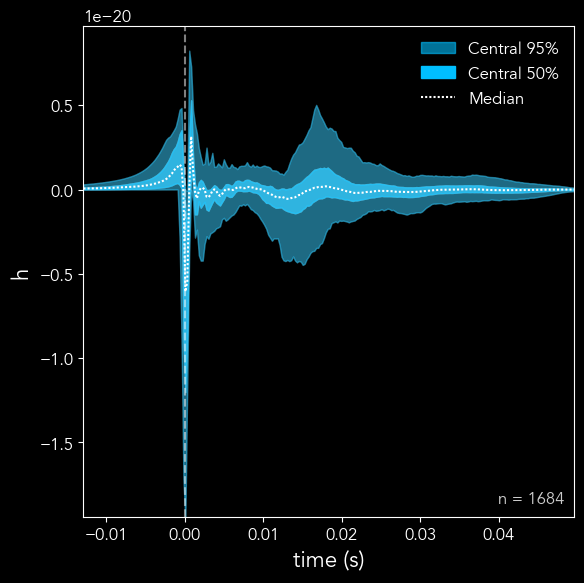

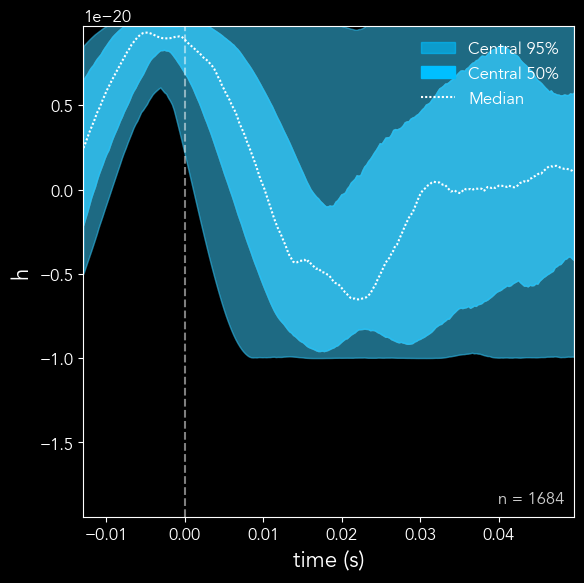

In [4]:
ccsn_dataset = CCSNSNRData(noise=True, curriculum=False)
ccsn_dataset.plot_signal_distribution(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

toy_dataset = ToyData(noise=False, curriculum=False)
toy_dataset.plot_signal_distribution(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/toy_signal_distribution.svg")

In [5]:
trainer = FlowMatchingTrainer(
    toy=False, 
    start_snr=200,
    end_snr=10,
    noise=False, 
    validation_split=0.1,
    curriculum=True,
    noise_realizations=1
)

# trainer.plot_candidate_signal(
#     snr=30,
#     index=60,
#     background="black"
# )


=== Data Split (on base signals) ===
Total base signals: 1684
Training base signals: 1516
Validation base signals: 168
First 5 training indices: [ 360  336   81  684 1374]
First 5 validation indices: [722 519 222  32 111]
✓ Verification PASSED: No overlap between train and validation sets
  Train signals: 1516 unique indices
  Val signals: 168 unique indices
  Total coverage: 1684 / 1684

Verifying data alignment:
Number of signals: 1516
Number of parameter sets: 1516
Parameter columns: ['beta1_IC_b', 'omega_0(rad|s)', 'A(km)', 'Ye_c_b']
First few parameter values:
      beta1_IC_b  omega_0(rad|s)  A(km)   Ye_c_b
369     0.144352             8.5    467  0.26472
345     0.121586            10.0    300  0.26472
84      0.172129            12.5    300  0.27792
708     0.001442             1.0    300  0.28282
1447    0.047885             4.0    634  0.28170

Verifying data alignment:
Number of signals: 168
Number of parameter sets: 168
Parameter columns: ['beta1_IC_b', 'omega_0(rad|s)', '

In [6]:
trainer.train()

Epochs:   0%|          | 1/256 [00:02<10:42,  2.52s/it]

Epoch 1/256 | Train MSE Loss: 0.3148 | Val MSE Loss: 0.2430


Epochs:   1%|          | 2/256 [00:04<09:37,  2.27s/it]

Epoch 2/256 | Train MSE Loss: 0.1148 | Val MSE Loss: 0.0952


Epochs:   1%|          | 3/256 [00:06<09:17,  2.20s/it]

Epoch 3/256 | Train MSE Loss: 0.0730 | Val MSE Loss: 0.0974


Epochs:   2%|▏         | 4/256 [00:09<10:18,  2.45s/it]

Epoch 4/256 | Train MSE Loss: 0.0590 | Val MSE Loss: 0.0759


Epochs:   2%|▏         | 5/256 [00:11<09:36,  2.30s/it]

Epoch 5/256 | Train MSE Loss: 0.0505 | Val MSE Loss: 0.0728


Epochs:   2%|▏         | 6/256 [00:13<08:51,  2.12s/it]

Epoch 6/256 | Train MSE Loss: 0.0443 | Val MSE Loss: 0.0631


Epochs:   3%|▎         | 7/256 [00:15<08:39,  2.08s/it]

Epoch 7/256 | Train MSE Loss: 0.0405 | Val MSE Loss: 0.0545


Epochs:   3%|▎         | 8/256 [00:17<08:28,  2.05s/it]

Epoch 8/256 | Train MSE Loss: 0.0370 | Val MSE Loss: 0.0527


Epochs:   4%|▎         | 9/256 [00:19<08:20,  2.03s/it]

Epoch 9/256 | Train MSE Loss: 0.0342 | Val MSE Loss: 0.0439


Epochs:   4%|▍         | 10/256 [00:21<08:19,  2.03s/it]

Epoch 10/256 | Train MSE Loss: 0.0320 | Val MSE Loss: 0.0341


Epochs:   4%|▍         | 11/256 [00:23<08:14,  2.02s/it]

Epoch 11/256 | Train MSE Loss: 0.0316 | Val MSE Loss: 0.0369


Epochs:   5%|▍         | 12/256 [00:25<08:07,  2.00s/it]

Epoch 12/256 | Train MSE Loss: 0.0302 | Val MSE Loss: 0.0412


Epochs:   5%|▌         | 13/256 [00:27<08:04,  1.99s/it]

Epoch 13/256 | Train MSE Loss: 0.0291 | Val MSE Loss: 0.0391


Epochs:   5%|▌         | 14/256 [00:29<08:02,  1.99s/it]

Epoch 14/256 | Train MSE Loss: 0.0292 | Val MSE Loss: 0.0406


Epochs:   6%|▌         | 15/256 [00:31<07:57,  1.98s/it]

Epoch 15/256 | Train MSE Loss: 0.0293 | Val MSE Loss: 0.0400


Epochs:   6%|▋         | 16/256 [00:33<07:53,  1.97s/it]

Epoch 16/256 | Train MSE Loss: 0.0299 | Val MSE Loss: 0.0372


Epochs:   7%|▋         | 17/256 [00:35<07:50,  1.97s/it]

Epoch 17/256 | Train MSE Loss: 0.0280 | Val MSE Loss: 0.0367


Epochs:   7%|▋         | 18/256 [00:37<07:49,  1.97s/it]

Epoch 18/256 | Train MSE Loss: 0.0291 | Val MSE Loss: 0.0359


Epochs:   7%|▋         | 19/256 [00:39<07:47,  1.97s/it]

Epoch 19/256 | Train MSE Loss: 0.0291 | Val MSE Loss: 0.0383


Epochs:   8%|▊         | 20/256 [00:41<07:49,  1.99s/it]

Epoch 20/256 | Train MSE Loss: 0.0292 | Val MSE Loss: 0.0371


Epochs:   8%|▊         | 21/256 [00:43<07:44,  1.98s/it]

Epoch 21/256 | Train MSE Loss: 0.0288 | Val MSE Loss: 0.0421


Epochs:   9%|▊         | 22/256 [00:45<07:47,  2.00s/it]

Epoch 22/256 | Train MSE Loss: 0.0290 | Val MSE Loss: 0.0378


Epochs:   9%|▉         | 23/256 [00:47<07:45,  2.00s/it]

Epoch 23/256 | Train MSE Loss: 0.0277 | Val MSE Loss: 0.0416


Epochs:   9%|▉         | 24/256 [00:49<07:44,  2.00s/it]

Epoch 24/256 | Train MSE Loss: 0.0290 | Val MSE Loss: 0.0417


Epochs:  10%|▉         | 25/256 [00:51<07:42,  2.00s/it]

Epoch 25/256 | Train MSE Loss: 0.0286 | Val MSE Loss: 0.0436


Epochs:  10%|█         | 26/256 [00:53<07:39,  2.00s/it]

Epoch 26/256 | Train MSE Loss: 0.0281 | Val MSE Loss: 0.0388


Epochs:  11%|█         | 27/256 [00:55<07:37,  2.00s/it]

Epoch 27/256 | Train MSE Loss: 0.0276 | Val MSE Loss: 0.0433


Epochs:  11%|█         | 28/256 [00:57<07:35,  2.00s/it]

Epoch 28/256 | Train MSE Loss: 0.0274 | Val MSE Loss: 0.0394


Epochs:  11%|█▏        | 29/256 [00:59<07:33,  2.00s/it]

Epoch 29/256 | Train MSE Loss: 0.0290 | Val MSE Loss: 0.0372


Epochs:  12%|█▏        | 30/256 [01:01<07:30,  1.99s/it]

Epoch 30/256 | Train MSE Loss: 0.0272 | Val MSE Loss: 0.0364


Epochs:  12%|█▏        | 31/256 [01:03<07:26,  1.99s/it]

Epoch 31/256 | Train MSE Loss: 0.0269 | Val MSE Loss: 0.0376


Epochs:  12%|█▎        | 32/256 [01:05<07:26,  1.99s/it]

Epoch 32/256 | Train MSE Loss: 0.0277 | Val MSE Loss: 0.0422


Epochs:  13%|█▎        | 33/256 [01:07<07:30,  2.02s/it]

Epoch 33/256 | Train MSE Loss: 0.0275 | Val MSE Loss: 0.0447


Epochs:  13%|█▎        | 34/256 [01:09<07:27,  2.02s/it]

Epoch 34/256 | Train MSE Loss: 0.0263 | Val MSE Loss: 0.0409


Epochs:  14%|█▎        | 35/256 [01:11<07:24,  2.01s/it]

Epoch 35/256 | Train MSE Loss: 0.0268 | Val MSE Loss: 0.0352


Epochs:  14%|█▍        | 36/256 [01:13<07:20,  2.00s/it]

Epoch 36/256 | Train MSE Loss: 0.0272 | Val MSE Loss: 0.0396


Epochs:  14%|█▍        | 37/256 [01:15<07:18,  2.00s/it]

Epoch 37/256 | Train MSE Loss: 0.0261 | Val MSE Loss: 0.0399


Epochs:  15%|█▍        | 38/256 [01:17<07:18,  2.01s/it]

Epoch 38/256 | Train MSE Loss: 0.0276 | Val MSE Loss: 0.0414


Epochs:  15%|█▌        | 39/256 [01:19<07:16,  2.01s/it]

Epoch 39/256 | Train MSE Loss: 0.0269 | Val MSE Loss: 0.0377


Epochs:  16%|█▌        | 40/256 [01:21<07:14,  2.01s/it]

Epoch 40/256 | Train MSE Loss: 0.0278 | Val MSE Loss: 0.0442


Epochs:  16%|█▌        | 41/256 [01:23<07:15,  2.02s/it]

Epoch 41/256 | Train MSE Loss: 0.0269 | Val MSE Loss: 0.0365


Epochs:  16%|█▋        | 42/256 [01:25<07:12,  2.02s/it]

Epoch 42/256 | Train MSE Loss: 0.0267 | Val MSE Loss: 0.0431


Epochs:  17%|█▋        | 43/256 [01:27<07:09,  2.02s/it]

Epoch 43/256 | Train MSE Loss: 0.0264 | Val MSE Loss: 0.0424


Epochs:  17%|█▋        | 44/256 [01:29<07:05,  2.01s/it]

Epoch 44/256 | Train MSE Loss: 0.0266 | Val MSE Loss: 0.0461


Epochs:  18%|█▊        | 45/256 [01:31<07:02,  2.00s/it]

Epoch 45/256 | Train MSE Loss: 0.0266 | Val MSE Loss: 0.0422


Epochs:  18%|█▊        | 46/256 [01:33<06:57,  1.99s/it]

Epoch 46/256 | Train MSE Loss: 0.0274 | Val MSE Loss: 0.0427


Epochs:  18%|█▊        | 47/256 [01:35<06:57,  2.00s/it]

Epoch 47/256 | Train MSE Loss: 0.0268 | Val MSE Loss: 0.0399


Epochs:  19%|█▉        | 48/256 [01:37<06:54,  1.99s/it]

Epoch 48/256 | Train MSE Loss: 0.0258 | Val MSE Loss: 0.0391


Epochs:  19%|█▉        | 49/256 [01:39<06:51,  1.99s/it]

Epoch 49/256 | Train MSE Loss: 0.0273 | Val MSE Loss: 0.0395


Epochs:  20%|█▉        | 50/256 [01:41<06:50,  1.99s/it]

Epoch 50/256 | Train MSE Loss: 0.0265 | Val MSE Loss: 0.0408


Epochs:  20%|█▉        | 51/256 [01:43<06:49,  2.00s/it]

Epoch 51/256 | Train MSE Loss: 0.0261 | Val MSE Loss: 0.0492


Epochs:  20%|██        | 52/256 [01:45<06:47,  2.00s/it]

Epoch 52/256 | Train MSE Loss: 0.0270 | Val MSE Loss: 0.0426


Epochs:  21%|██        | 53/256 [01:47<06:46,  2.00s/it]

Epoch 53/256 | Train MSE Loss: 0.0271 | Val MSE Loss: 0.0449


Epochs:  21%|██        | 54/256 [01:49<06:44,  2.00s/it]

Epoch 54/256 | Train MSE Loss: 0.0256 | Val MSE Loss: 0.0489


Epochs:  21%|██▏       | 55/256 [01:51<06:40,  1.99s/it]

Epoch 55/256 | Train MSE Loss: 0.0261 | Val MSE Loss: 0.0414


Epochs:  22%|██▏       | 56/256 [01:53<06:39,  2.00s/it]

Epoch 56/256 | Train MSE Loss: 0.0260 | Val MSE Loss: 0.0428


Epochs:  22%|██▏       | 57/256 [01:55<06:37,  2.00s/it]

Epoch 57/256 | Train MSE Loss: 0.0251 | Val MSE Loss: 0.0434


Epochs:  23%|██▎       | 58/256 [01:57<06:36,  2.00s/it]

Epoch 58/256 | Train MSE Loss: 0.0263 | Val MSE Loss: 0.0419


Epochs:  23%|██▎       | 59/256 [01:59<06:33,  1.99s/it]

Epoch 59/256 | Train MSE Loss: 0.0258 | Val MSE Loss: 0.0442


Epochs:  23%|██▎       | 60/256 [02:01<06:31,  2.00s/it]

Epoch 60/256 | Train MSE Loss: 0.0244 | Val MSE Loss: 0.0474


Epochs:  24%|██▍       | 61/256 [02:03<06:29,  2.00s/it]

Epoch 61/256 | Train MSE Loss: 0.0250 | Val MSE Loss: 0.0456


Epochs:  24%|██▍       | 62/256 [02:05<06:25,  1.99s/it]

Epoch 62/256 | Train MSE Loss: 0.0261 | Val MSE Loss: 0.0394


Epochs:  25%|██▍       | 63/256 [02:07<06:23,  1.99s/it]

Epoch 63/256 | Train MSE Loss: 0.0258 | Val MSE Loss: 0.0393


Epochs:  25%|██▌       | 64/256 [02:09<06:21,  1.99s/it]

Epoch 64/256 | Train MSE Loss: 0.0256 | Val MSE Loss: 0.0406


Epochs:  25%|██▌       | 65/256 [02:11<06:19,  1.99s/it]

Epoch 65/256 | Train MSE Loss: 0.0262 | Val MSE Loss: 0.0440


Epochs:  26%|██▌       | 66/256 [02:13<06:16,  1.98s/it]

Epoch 66/256 | Train MSE Loss: 0.0246 | Val MSE Loss: 0.0494


Epochs:  26%|██▌       | 67/256 [02:15<06:14,  1.98s/it]

Epoch 67/256 | Train MSE Loss: 0.0254 | Val MSE Loss: 0.0414


Epochs:  27%|██▋       | 68/256 [02:17<06:13,  1.98s/it]

Epoch 68/256 | Train MSE Loss: 0.0262 | Val MSE Loss: 0.0352


Epochs:  27%|██▋       | 69/256 [02:19<06:12,  1.99s/it]

Epoch 69/256 | Train MSE Loss: 0.0242 | Val MSE Loss: 0.0370


Epochs:  27%|██▋       | 70/256 [02:21<06:10,  1.99s/it]

Epoch 70/256 | Train MSE Loss: 0.0249 | Val MSE Loss: 0.0455


Epochs:  28%|██▊       | 71/256 [02:23<06:11,  2.01s/it]

Epoch 71/256 | Train MSE Loss: 0.0246 | Val MSE Loss: 0.0479


Epochs:  28%|██▊       | 72/256 [02:25<06:07,  2.00s/it]

Epoch 72/256 | Train MSE Loss: 0.0249 | Val MSE Loss: 0.0443


Epochs:  29%|██▊       | 73/256 [02:27<06:05,  2.00s/it]

Epoch 73/256 | Train MSE Loss: 0.0247 | Val MSE Loss: 0.0379


Epochs:  29%|██▉       | 74/256 [02:29<06:02,  1.99s/it]

Epoch 74/256 | Train MSE Loss: 0.0246 | Val MSE Loss: 0.0373


Epochs:  29%|██▉       | 75/256 [02:31<06:00,  1.99s/it]

Epoch 75/256 | Train MSE Loss: 0.0253 | Val MSE Loss: 0.0412


Epochs:  30%|██▉       | 76/256 [02:33<05:57,  1.99s/it]

Epoch 76/256 | Train MSE Loss: 0.0240 | Val MSE Loss: 0.0367


Epochs:  30%|███       | 77/256 [02:34<05:53,  1.97s/it]

Epoch 77/256 | Train MSE Loss: 0.0243 | Val MSE Loss: 0.0416


Epochs:  30%|███       | 78/256 [02:36<05:51,  1.97s/it]

Epoch 78/256 | Train MSE Loss: 0.0256 | Val MSE Loss: 0.0484


Epochs:  31%|███       | 79/256 [02:38<05:49,  1.97s/it]

Epoch 79/256 | Train MSE Loss: 0.0249 | Val MSE Loss: 0.0434


Epochs:  31%|███▏      | 80/256 [02:40<05:47,  1.98s/it]

Epoch 80/256 | Train MSE Loss: 0.0258 | Val MSE Loss: 0.0406


Epochs:  32%|███▏      | 81/256 [02:42<05:45,  1.97s/it]

Epoch 81/256 | Train MSE Loss: 0.0243 | Val MSE Loss: 0.0363


Epochs:  32%|███▏      | 82/256 [02:44<05:43,  1.97s/it]

Epoch 82/256 | Train MSE Loss: 0.0236 | Val MSE Loss: 0.0428


Epochs:  32%|███▏      | 83/256 [02:46<05:41,  1.98s/it]

Epoch 83/256 | Train MSE Loss: 0.0251 | Val MSE Loss: 0.0345


Epochs:  33%|███▎      | 84/256 [02:48<05:40,  1.98s/it]

Epoch 84/256 | Train MSE Loss: 0.0246 | Val MSE Loss: 0.0409


Epochs:  33%|███▎      | 85/256 [02:50<05:38,  1.98s/it]

Epoch 85/256 | Train MSE Loss: 0.0246 | Val MSE Loss: 0.0409


Epochs:  34%|███▎      | 86/256 [02:52<05:37,  1.99s/it]

Epoch 86/256 | Train MSE Loss: 0.0245 | Val MSE Loss: 0.0434


Epochs:  34%|███▍      | 87/256 [02:54<05:35,  1.98s/it]

Epoch 87/256 | Train MSE Loss: 0.0236 | Val MSE Loss: 0.0419


Epochs:  34%|███▍      | 88/256 [02:56<05:32,  1.98s/it]

Epoch 88/256 | Train MSE Loss: 0.0239 | Val MSE Loss: 0.0399


Epochs:  35%|███▍      | 89/256 [02:58<05:31,  1.98s/it]

Epoch 89/256 | Train MSE Loss: 0.0230 | Val MSE Loss: 0.0417


Epochs:  35%|███▌      | 90/256 [03:00<05:27,  1.97s/it]

Epoch 90/256 | Train MSE Loss: 0.0241 | Val MSE Loss: 0.0442


Epochs:  36%|███▌      | 91/256 [03:02<05:25,  1.97s/it]

Epoch 91/256 | Train MSE Loss: 0.0237 | Val MSE Loss: 0.0383


Epochs:  36%|███▌      | 92/256 [03:04<05:23,  1.97s/it]

Epoch 92/256 | Train MSE Loss: 0.0239 | Val MSE Loss: 0.0385


Epochs:  36%|███▋      | 93/256 [03:06<05:21,  1.97s/it]

Epoch 93/256 | Train MSE Loss: 0.0245 | Val MSE Loss: 0.0444


Epochs:  37%|███▋      | 94/256 [03:08<05:20,  1.98s/it]

Epoch 94/256 | Train MSE Loss: 0.0252 | Val MSE Loss: 0.0421


Epochs:  37%|███▋      | 95/256 [03:10<05:16,  1.97s/it]

Epoch 95/256 | Train MSE Loss: 0.0239 | Val MSE Loss: 0.0434


Epochs:  38%|███▊      | 96/256 [03:12<05:14,  1.97s/it]

Epoch 96/256 | Train MSE Loss: 0.0246 | Val MSE Loss: 0.0337


Epochs:  38%|███▊      | 97/256 [03:14<05:33,  2.10s/it]

Epoch 97/256 | Train MSE Loss: 0.0237 | Val MSE Loss: 0.0381


Epochs:  38%|███▊      | 98/256 [03:16<05:22,  2.04s/it]

Epoch 98/256 | Train MSE Loss: 0.0231 | Val MSE Loss: 0.0430


Epochs:  39%|███▊      | 99/256 [03:18<05:16,  2.02s/it]

Epoch 99/256 | Train MSE Loss: 0.0233 | Val MSE Loss: 0.0436


Epochs:  39%|███▉      | 100/256 [03:20<05:10,  1.99s/it]

Epoch 100/256 | Train MSE Loss: 0.0249 | Val MSE Loss: 0.0420


Epochs:  39%|███▉      | 101/256 [03:22<05:13,  2.03s/it]

Epoch 101/256 | Train MSE Loss: 0.0240 | Val MSE Loss: 0.0459


Epochs:  40%|███▉      | 102/256 [03:24<05:07,  1.99s/it]

Epoch 102/256 | Train MSE Loss: 0.0232 | Val MSE Loss: 0.0414


Epochs:  40%|████      | 103/256 [03:26<05:04,  1.99s/it]

Epoch 103/256 | Train MSE Loss: 0.0228 | Val MSE Loss: 0.0408


Epochs:  41%|████      | 104/256 [03:28<04:59,  1.97s/it]

Epoch 104/256 | Train MSE Loss: 0.0234 | Val MSE Loss: 0.0403


Epochs:  41%|████      | 105/256 [03:30<04:55,  1.96s/it]

Epoch 105/256 | Train MSE Loss: 0.0234 | Val MSE Loss: 0.0372


Epochs:  41%|████▏     | 106/256 [03:32<04:51,  1.94s/it]

Epoch 106/256 | Train MSE Loss: 0.0240 | Val MSE Loss: 0.0418


Epochs:  42%|████▏     | 107/256 [03:34<04:50,  1.95s/it]

Epoch 107/256 | Train MSE Loss: 0.0240 | Val MSE Loss: 0.0478


Epochs:  42%|████▏     | 108/256 [03:36<04:49,  1.96s/it]

Epoch 108/256 | Train MSE Loss: 0.0229 | Val MSE Loss: 0.0432


Epochs:  43%|████▎     | 109/256 [03:38<04:46,  1.95s/it]

Epoch 109/256 | Train MSE Loss: 0.0229 | Val MSE Loss: 0.0452


Epochs:  43%|████▎     | 110/256 [03:40<04:51,  2.00s/it]

Epoch 110/256 | Train MSE Loss: 0.0234 | Val MSE Loss: 0.0389


Epochs:  43%|████▎     | 111/256 [03:42<04:46,  1.97s/it]

Epoch 111/256 | Train MSE Loss: 0.0238 | Val MSE Loss: 0.0455


Epochs:  44%|████▍     | 112/256 [03:44<04:43,  1.97s/it]

Epoch 112/256 | Train MSE Loss: 0.0236 | Val MSE Loss: 0.0373


Epochs:  44%|████▍     | 113/256 [03:46<04:41,  1.97s/it]

Epoch 113/256 | Train MSE Loss: 0.0237 | Val MSE Loss: 0.0385


Epochs:  45%|████▍     | 114/256 [03:48<04:38,  1.96s/it]

Epoch 114/256 | Train MSE Loss: 0.0243 | Val MSE Loss: 0.0429


Epochs:  45%|████▍     | 115/256 [03:50<04:38,  1.97s/it]

Epoch 115/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0403


Epochs:  45%|████▌     | 116/256 [03:52<04:36,  1.97s/it]

Epoch 116/256 | Train MSE Loss: 0.0229 | Val MSE Loss: 0.0414


Epochs:  46%|████▌     | 117/256 [03:54<04:31,  1.95s/it]

Epoch 117/256 | Train MSE Loss: 0.0239 | Val MSE Loss: 0.0400


Epochs:  46%|████▌     | 118/256 [03:56<04:28,  1.95s/it]

Epoch 118/256 | Train MSE Loss: 0.0249 | Val MSE Loss: 0.0407


Epochs:  46%|████▋     | 119/256 [03:57<04:26,  1.95s/it]

Epoch 119/256 | Train MSE Loss: 0.0238 | Val MSE Loss: 0.0427


Epochs:  47%|████▋     | 120/256 [03:59<04:24,  1.95s/it]

Epoch 120/256 | Train MSE Loss: 0.0232 | Val MSE Loss: 0.0345


Epochs:  47%|████▋     | 121/256 [04:01<04:23,  1.95s/it]

Epoch 121/256 | Train MSE Loss: 0.0234 | Val MSE Loss: 0.0427


Epochs:  48%|████▊     | 122/256 [04:03<04:21,  1.95s/it]

Epoch 122/256 | Train MSE Loss: 0.0230 | Val MSE Loss: 0.0455


Epochs:  48%|████▊     | 123/256 [04:05<04:19,  1.95s/it]

Epoch 123/256 | Train MSE Loss: 0.0223 | Val MSE Loss: 0.0425


Epochs:  48%|████▊     | 124/256 [04:07<04:17,  1.95s/it]

Epoch 124/256 | Train MSE Loss: 0.0240 | Val MSE Loss: 0.0585


Epochs:  49%|████▉     | 125/256 [04:09<04:17,  1.97s/it]

Epoch 125/256 | Train MSE Loss: 0.0229 | Val MSE Loss: 0.0395


Epochs:  49%|████▉     | 126/256 [04:11<04:17,  1.98s/it]

Epoch 126/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0460


Epochs:  50%|████▉     | 127/256 [04:13<04:14,  1.97s/it]

Epoch 127/256 | Train MSE Loss: 0.0231 | Val MSE Loss: 0.0456


Epochs:  50%|█████     | 128/256 [04:15<04:09,  1.95s/it]

Epoch 128/256 | Train MSE Loss: 0.0223 | Val MSE Loss: 0.0387


Epochs:  50%|█████     | 129/256 [04:17<04:05,  1.93s/it]

Epoch 129/256 | Train MSE Loss: 0.0229 | Val MSE Loss: 0.0416


Epochs:  51%|█████     | 130/256 [04:19<04:01,  1.92s/it]

Epoch 130/256 | Train MSE Loss: 0.0241 | Val MSE Loss: 0.0387


Epochs:  51%|█████     | 131/256 [04:21<04:03,  1.95s/it]

Epoch 131/256 | Train MSE Loss: 0.0236 | Val MSE Loss: 0.0402


Epochs:  52%|█████▏    | 132/256 [04:23<04:03,  1.96s/it]

Epoch 132/256 | Train MSE Loss: 0.0231 | Val MSE Loss: 0.0423


Epochs:  52%|█████▏    | 133/256 [04:25<03:59,  1.95s/it]

Epoch 133/256 | Train MSE Loss: 0.0230 | Val MSE Loss: 0.0326


Epochs:  52%|█████▏    | 134/256 [04:27<03:57,  1.95s/it]

Epoch 134/256 | Train MSE Loss: 0.0240 | Val MSE Loss: 0.0444


Epochs:  53%|█████▎    | 135/256 [04:29<03:53,  1.93s/it]

Epoch 135/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0413


Epochs:  53%|█████▎    | 136/256 [04:31<03:50,  1.92s/it]

Epoch 136/256 | Train MSE Loss: 0.0232 | Val MSE Loss: 0.0500


Epochs:  54%|█████▎    | 137/256 [04:32<03:47,  1.91s/it]

Epoch 137/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0376


Epochs:  54%|█████▍    | 138/256 [04:34<03:45,  1.91s/it]

Epoch 138/256 | Train MSE Loss: 0.0226 | Val MSE Loss: 0.0433


Epochs:  54%|█████▍    | 139/256 [04:36<03:44,  1.92s/it]

Epoch 139/256 | Train MSE Loss: 0.0224 | Val MSE Loss: 0.0409


Epochs:  55%|█████▍    | 140/256 [04:38<03:43,  1.92s/it]

Epoch 140/256 | Train MSE Loss: 0.0219 | Val MSE Loss: 0.0407


Epochs:  55%|█████▌    | 141/256 [04:40<03:38,  1.90s/it]

Epoch 141/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0413


Epochs:  55%|█████▌    | 142/256 [04:42<03:40,  1.93s/it]

Epoch 142/256 | Train MSE Loss: 0.0228 | Val MSE Loss: 0.0388


Epochs:  56%|█████▌    | 143/256 [04:44<03:35,  1.91s/it]

Epoch 143/256 | Train MSE Loss: 0.0233 | Val MSE Loss: 0.0384


Epochs:  56%|█████▋    | 144/256 [04:46<03:32,  1.90s/it]

Epoch 144/256 | Train MSE Loss: 0.0214 | Val MSE Loss: 0.0381


Epochs:  57%|█████▋    | 145/256 [04:48<03:31,  1.90s/it]

Epoch 145/256 | Train MSE Loss: 0.0228 | Val MSE Loss: 0.0346


Epochs:  57%|█████▋    | 146/256 [04:50<03:28,  1.89s/it]

Epoch 146/256 | Train MSE Loss: 0.0222 | Val MSE Loss: 0.0419


Epochs:  57%|█████▋    | 147/256 [04:51<03:24,  1.88s/it]

Epoch 147/256 | Train MSE Loss: 0.0219 | Val MSE Loss: 0.0396


Epochs:  58%|█████▊    | 148/256 [04:53<03:20,  1.86s/it]

Epoch 148/256 | Train MSE Loss: 0.0224 | Val MSE Loss: 0.0364


Epochs:  58%|█████▊    | 149/256 [04:55<03:20,  1.88s/it]

Epoch 149/256 | Train MSE Loss: 0.0233 | Val MSE Loss: 0.0382


Epochs:  59%|█████▊    | 150/256 [04:57<03:19,  1.88s/it]

Epoch 150/256 | Train MSE Loss: 0.0235 | Val MSE Loss: 0.0415


Epochs:  59%|█████▉    | 151/256 [04:59<03:16,  1.87s/it]

Epoch 151/256 | Train MSE Loss: 0.0237 | Val MSE Loss: 0.0384


Epochs:  59%|█████▉    | 152/256 [05:01<03:16,  1.89s/it]

Epoch 152/256 | Train MSE Loss: 0.0216 | Val MSE Loss: 0.0396


Epochs:  60%|█████▉    | 153/256 [05:03<03:17,  1.92s/it]

Epoch 153/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0352


Epochs:  60%|██████    | 154/256 [05:05<03:15,  1.92s/it]

Epoch 154/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0429


Epochs:  61%|██████    | 155/256 [05:07<03:13,  1.91s/it]

Epoch 155/256 | Train MSE Loss: 0.0219 | Val MSE Loss: 0.0364


Epochs:  61%|██████    | 156/256 [05:09<03:11,  1.92s/it]

Epoch 156/256 | Train MSE Loss: 0.0220 | Val MSE Loss: 0.0454


Epochs:  61%|██████▏   | 157/256 [05:10<03:09,  1.92s/it]

Epoch 157/256 | Train MSE Loss: 0.0222 | Val MSE Loss: 0.0339


Epochs:  62%|██████▏   | 158/256 [05:12<03:06,  1.91s/it]

Epoch 158/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0374


Epochs:  62%|██████▏   | 159/256 [05:14<03:04,  1.90s/it]

Epoch 159/256 | Train MSE Loss: 0.0221 | Val MSE Loss: 0.0398


Epochs:  62%|██████▎   | 160/256 [05:16<03:02,  1.91s/it]

Epoch 160/256 | Train MSE Loss: 0.0226 | Val MSE Loss: 0.0341


Epochs:  63%|██████▎   | 161/256 [05:18<03:01,  1.91s/it]

Epoch 161/256 | Train MSE Loss: 0.0224 | Val MSE Loss: 0.0370


Epochs:  63%|██████▎   | 162/256 [05:20<02:59,  1.91s/it]

Epoch 162/256 | Train MSE Loss: 0.0219 | Val MSE Loss: 0.0389


Epochs:  64%|██████▎   | 163/256 [05:22<02:57,  1.91s/it]

Epoch 163/256 | Train MSE Loss: 0.0221 | Val MSE Loss: 0.0408


Epochs:  64%|██████▍   | 164/256 [05:24<02:53,  1.89s/it]

Epoch 164/256 | Train MSE Loss: 0.0226 | Val MSE Loss: 0.0351


Epochs:  64%|██████▍   | 165/256 [05:26<02:52,  1.90s/it]

Epoch 165/256 | Train MSE Loss: 0.0220 | Val MSE Loss: 0.0385


Epochs:  65%|██████▍   | 166/256 [05:28<02:51,  1.90s/it]

Epoch 166/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0311


Epochs:  65%|██████▌   | 167/256 [05:29<02:49,  1.90s/it]

Epoch 167/256 | Train MSE Loss: 0.0230 | Val MSE Loss: 0.0363


Epochs:  66%|██████▌   | 168/256 [05:31<02:47,  1.90s/it]

Epoch 168/256 | Train MSE Loss: 0.0234 | Val MSE Loss: 0.0405


Epochs:  66%|██████▌   | 169/256 [05:33<02:44,  1.89s/it]

Epoch 169/256 | Train MSE Loss: 0.0225 | Val MSE Loss: 0.0315


Epochs:  66%|██████▋   | 170/256 [05:35<02:44,  1.91s/it]

Epoch 170/256 | Train MSE Loss: 0.0234 | Val MSE Loss: 0.0317


Epochs:  67%|██████▋   | 171/256 [05:37<02:42,  1.91s/it]

Epoch 171/256 | Train MSE Loss: 0.0243 | Val MSE Loss: 0.0356


Epochs:  67%|██████▋   | 172/256 [05:39<02:39,  1.90s/it]

Epoch 172/256 | Train MSE Loss: 0.0224 | Val MSE Loss: 0.0309


Epochs:  68%|██████▊   | 173/256 [05:41<02:38,  1.91s/it]

Epoch 173/256 | Train MSE Loss: 0.0232 | Val MSE Loss: 0.0411


Epochs:  68%|██████▊   | 174/256 [05:43<02:34,  1.88s/it]

Epoch 174/256 | Train MSE Loss: 0.0232 | Val MSE Loss: 0.0360


Epochs:  68%|██████▊   | 175/256 [05:45<02:33,  1.90s/it]

Epoch 175/256 | Train MSE Loss: 0.0211 | Val MSE Loss: 0.0400


Epochs:  69%|██████▉   | 176/256 [05:47<02:31,  1.89s/it]

Epoch 176/256 | Train MSE Loss: 0.0223 | Val MSE Loss: 0.0369


Epochs:  69%|██████▉   | 177/256 [05:48<02:28,  1.89s/it]

Epoch 177/256 | Train MSE Loss: 0.0208 | Val MSE Loss: 0.0415


Epochs:  70%|██████▉   | 178/256 [05:50<02:26,  1.88s/it]

Epoch 178/256 | Train MSE Loss: 0.0231 | Val MSE Loss: 0.0399


Epochs:  70%|██████▉   | 179/256 [05:52<02:23,  1.87s/it]

Epoch 179/256 | Train MSE Loss: 0.0219 | Val MSE Loss: 0.0404


Epochs:  70%|███████   | 180/256 [05:54<02:19,  1.84s/it]

Epoch 180/256 | Train MSE Loss: 0.0228 | Val MSE Loss: 0.0372


Epochs:  71%|███████   | 181/256 [05:56<02:17,  1.83s/it]

Epoch 181/256 | Train MSE Loss: 0.0228 | Val MSE Loss: 0.0335


Epochs:  71%|███████   | 182/256 [05:58<02:16,  1.84s/it]

Epoch 182/256 | Train MSE Loss: 0.0231 | Val MSE Loss: 0.0319


Epochs:  71%|███████▏  | 183/256 [05:59<02:14,  1.85s/it]

Epoch 183/256 | Train MSE Loss: 0.0213 | Val MSE Loss: 0.0474


Epochs:  72%|███████▏  | 184/256 [06:01<02:13,  1.85s/it]

Epoch 184/256 | Train MSE Loss: 0.0220 | Val MSE Loss: 0.0333


Epochs:  72%|███████▏  | 185/256 [06:03<02:11,  1.85s/it]

Epoch 185/256 | Train MSE Loss: 0.0218 | Val MSE Loss: 0.0368


Epochs:  73%|███████▎  | 186/256 [06:05<02:09,  1.85s/it]

Epoch 186/256 | Train MSE Loss: 0.0224 | Val MSE Loss: 0.0373


Epochs:  73%|███████▎  | 187/256 [06:07<02:05,  1.82s/it]

Epoch 187/256 | Train MSE Loss: 0.0226 | Val MSE Loss: 0.0393


Epochs:  73%|███████▎  | 188/256 [06:08<02:01,  1.79s/it]

Epoch 188/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0391


Epochs:  74%|███████▍  | 189/256 [06:10<02:00,  1.80s/it]

Epoch 189/256 | Train MSE Loss: 0.0224 | Val MSE Loss: 0.0424


Epochs:  74%|███████▍  | 190/256 [06:12<01:59,  1.81s/it]

Epoch 190/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0343


Epochs:  75%|███████▍  | 191/256 [06:14<01:59,  1.83s/it]

Epoch 191/256 | Train MSE Loss: 0.0211 | Val MSE Loss: 0.0389


Epochs:  75%|███████▌  | 192/256 [06:16<01:57,  1.84s/it]

Epoch 192/256 | Train MSE Loss: 0.0214 | Val MSE Loss: 0.0292


Epochs:  75%|███████▌  | 193/256 [06:18<01:55,  1.83s/it]

Epoch 193/256 | Train MSE Loss: 0.0221 | Val MSE Loss: 0.0324


Epochs:  76%|███████▌  | 194/256 [06:19<01:52,  1.82s/it]

Epoch 194/256 | Train MSE Loss: 0.0216 | Val MSE Loss: 0.0323


Epochs:  76%|███████▌  | 195/256 [06:21<01:50,  1.81s/it]

Epoch 195/256 | Train MSE Loss: 0.0220 | Val MSE Loss: 0.0333


Epochs:  77%|███████▋  | 196/256 [06:23<01:50,  1.84s/it]

Epoch 196/256 | Train MSE Loss: 0.0214 | Val MSE Loss: 0.0348


Epochs:  77%|███████▋  | 197/256 [06:25<01:49,  1.85s/it]

Epoch 197/256 | Train MSE Loss: 0.0221 | Val MSE Loss: 0.0363


Epochs:  77%|███████▋  | 198/256 [06:27<01:46,  1.83s/it]

Epoch 198/256 | Train MSE Loss: 0.0219 | Val MSE Loss: 0.0369


Epochs:  78%|███████▊  | 199/256 [06:29<01:43,  1.82s/it]

Epoch 199/256 | Train MSE Loss: 0.0218 | Val MSE Loss: 0.0374


Epochs:  78%|███████▊  | 200/256 [06:30<01:41,  1.82s/it]

Epoch 200/256 | Train MSE Loss: 0.0213 | Val MSE Loss: 0.0307


Epochs:  79%|███████▊  | 201/256 [06:32<01:40,  1.82s/it]

Epoch 201/256 | Train MSE Loss: 0.0218 | Val MSE Loss: 0.0342


Epochs:  79%|███████▉  | 202/256 [06:34<01:38,  1.82s/it]

Epoch 202/256 | Train MSE Loss: 0.0220 | Val MSE Loss: 0.0298


Epochs:  79%|███████▉  | 203/256 [06:36<01:35,  1.80s/it]

Epoch 203/256 | Train MSE Loss: 0.0219 | Val MSE Loss: 0.0305


Epochs:  80%|███████▉  | 204/256 [06:38<01:32,  1.79s/it]

Epoch 204/256 | Train MSE Loss: 0.0215 | Val MSE Loss: 0.0297


Epochs:  80%|████████  | 205/256 [06:39<01:30,  1.78s/it]

Epoch 205/256 | Train MSE Loss: 0.0224 | Val MSE Loss: 0.0315


Epochs:  80%|████████  | 206/256 [06:41<01:30,  1.81s/it]

Epoch 206/256 | Train MSE Loss: 0.0215 | Val MSE Loss: 0.0316


Epochs:  81%|████████  | 207/256 [06:43<01:27,  1.79s/it]

Epoch 207/256 | Train MSE Loss: 0.0211 | Val MSE Loss: 0.0315


Epochs:  81%|████████▏ | 208/256 [06:45<01:25,  1.78s/it]

Epoch 208/256 | Train MSE Loss: 0.0213 | Val MSE Loss: 0.0326


Epochs:  82%|████████▏ | 209/256 [06:46<01:23,  1.77s/it]

Epoch 209/256 | Train MSE Loss: 0.0217 | Val MSE Loss: 0.0304


Epochs:  82%|████████▏ | 210/256 [06:48<01:21,  1.77s/it]

Epoch 210/256 | Train MSE Loss: 0.0226 | Val MSE Loss: 0.0292


Epochs:  82%|████████▏ | 211/256 [06:50<01:19,  1.77s/it]

Epoch 211/256 | Train MSE Loss: 0.0226 | Val MSE Loss: 0.0357


Epochs:  83%|████████▎ | 212/256 [06:52<01:17,  1.76s/it]

Epoch 212/256 | Train MSE Loss: 0.0222 | Val MSE Loss: 0.0308


Epochs:  83%|████████▎ | 213/256 [06:53<01:15,  1.75s/it]

Epoch 213/256 | Train MSE Loss: 0.0227 | Val MSE Loss: 0.0335


Epochs:  84%|████████▎ | 214/256 [06:55<01:13,  1.75s/it]

Epoch 214/256 | Train MSE Loss: 0.0214 | Val MSE Loss: 0.0339


Epochs:  84%|████████▍ | 215/256 [06:57<01:11,  1.74s/it]

Epoch 215/256 | Train MSE Loss: 0.0225 | Val MSE Loss: 0.0311


Epochs:  84%|████████▍ | 216/256 [06:59<01:09,  1.74s/it]

Epoch 216/256 | Train MSE Loss: 0.0230 | Val MSE Loss: 0.0262


Epochs:  85%|████████▍ | 217/256 [07:00<01:07,  1.74s/it]

Epoch 217/256 | Train MSE Loss: 0.0209 | Val MSE Loss: 0.0326


Epochs:  85%|████████▌ | 218/256 [07:02<01:06,  1.74s/it]

Epoch 218/256 | Train MSE Loss: 0.0212 | Val MSE Loss: 0.0334


Epochs:  86%|████████▌ | 219/256 [07:04<01:04,  1.74s/it]

Epoch 219/256 | Train MSE Loss: 0.0217 | Val MSE Loss: 0.0258


Epochs:  86%|████████▌ | 220/256 [07:06<01:02,  1.74s/it]

Epoch 220/256 | Train MSE Loss: 0.0209 | Val MSE Loss: 0.0317


Epochs:  86%|████████▋ | 221/256 [07:07<01:01,  1.76s/it]

Epoch 221/256 | Train MSE Loss: 0.0216 | Val MSE Loss: 0.0299


Epochs:  87%|████████▋ | 222/256 [07:09<00:59,  1.74s/it]

Epoch 222/256 | Train MSE Loss: 0.0217 | Val MSE Loss: 0.0285


Epochs:  87%|████████▋ | 223/256 [07:11<00:56,  1.73s/it]

Epoch 223/256 | Train MSE Loss: 0.0226 | Val MSE Loss: 0.0340


Epochs:  88%|████████▊ | 224/256 [07:13<00:55,  1.74s/it]

Epoch 224/256 | Train MSE Loss: 0.0221 | Val MSE Loss: 0.0335


Epochs:  88%|████████▊ | 225/256 [07:14<00:54,  1.76s/it]

Epoch 225/256 | Train MSE Loss: 0.0221 | Val MSE Loss: 0.0285


Epochs:  88%|████████▊ | 226/256 [07:16<00:52,  1.76s/it]

Epoch 226/256 | Train MSE Loss: 0.0221 | Val MSE Loss: 0.0312


Epochs:  89%|████████▊ | 227/256 [07:18<00:50,  1.73s/it]

Epoch 227/256 | Train MSE Loss: 0.0213 | Val MSE Loss: 0.0322


Epochs:  89%|████████▉ | 228/256 [07:20<00:48,  1.72s/it]

Epoch 228/256 | Train MSE Loss: 0.0225 | Val MSE Loss: 0.0282


Epochs:  89%|████████▉ | 229/256 [07:21<00:47,  1.74s/it]

Epoch 229/256 | Train MSE Loss: 0.0213 | Val MSE Loss: 0.0333


Epochs:  90%|████████▉ | 230/256 [07:23<00:45,  1.76s/it]

Epoch 230/256 | Train MSE Loss: 0.0217 | Val MSE Loss: 0.0298


Epochs:  90%|█████████ | 231/256 [07:25<00:43,  1.74s/it]

Epoch 231/256 | Train MSE Loss: 0.0223 | Val MSE Loss: 0.0292


Epochs:  91%|█████████ | 232/256 [07:27<00:41,  1.73s/it]

Epoch 232/256 | Train MSE Loss: 0.0210 | Val MSE Loss: 0.0328


Epochs:  91%|█████████ | 233/256 [07:28<00:40,  1.75s/it]

Epoch 233/256 | Train MSE Loss: 0.0215 | Val MSE Loss: 0.0290


Epochs:  91%|█████████▏| 234/256 [07:30<00:38,  1.75s/it]

Epoch 234/256 | Train MSE Loss: 0.0215 | Val MSE Loss: 0.0269


Epochs:  92%|█████████▏| 235/256 [07:32<00:36,  1.75s/it]

Epoch 235/256 | Train MSE Loss: 0.0218 | Val MSE Loss: 0.0280


Epochs:  92%|█████████▏| 236/256 [07:34<00:35,  1.76s/it]

Epoch 236/256 | Train MSE Loss: 0.0223 | Val MSE Loss: 0.0296


Epochs:  93%|█████████▎| 237/256 [07:35<00:33,  1.75s/it]

Epoch 237/256 | Train MSE Loss: 0.0216 | Val MSE Loss: 0.0277


Epochs:  93%|█████████▎| 238/256 [07:37<00:31,  1.76s/it]

Epoch 238/256 | Train MSE Loss: 0.0206 | Val MSE Loss: 0.0258


Epochs:  93%|█████████▎| 239/256 [07:39<00:29,  1.73s/it]

Epoch 239/256 | Train MSE Loss: 0.0216 | Val MSE Loss: 0.0242


Epochs:  94%|█████████▍| 240/256 [07:41<00:27,  1.74s/it]

Epoch 240/256 | Train MSE Loss: 0.0215 | Val MSE Loss: 0.0270


Epochs:  94%|█████████▍| 241/256 [07:42<00:26,  1.74s/it]

Epoch 241/256 | Train MSE Loss: 0.0212 | Val MSE Loss: 0.0260


Epochs:  95%|█████████▍| 242/256 [07:44<00:24,  1.74s/it]

Epoch 242/256 | Train MSE Loss: 0.0218 | Val MSE Loss: 0.0273


Epochs:  95%|█████████▍| 243/256 [07:46<00:22,  1.75s/it]

Epoch 243/256 | Train MSE Loss: 0.0226 | Val MSE Loss: 0.0276


Epochs:  95%|█████████▌| 244/256 [07:47<00:20,  1.73s/it]

Epoch 244/256 | Train MSE Loss: 0.0212 | Val MSE Loss: 0.0267


Epochs:  96%|█████████▌| 245/256 [07:49<00:18,  1.72s/it]

Epoch 245/256 | Train MSE Loss: 0.0223 | Val MSE Loss: 0.0251


Epochs:  96%|█████████▌| 246/256 [07:51<00:17,  1.73s/it]

Epoch 246/256 | Train MSE Loss: 0.0217 | Val MSE Loss: 0.0317


Epochs:  96%|█████████▋| 247/256 [07:53<00:15,  1.70s/it]

Epoch 247/256 | Train MSE Loss: 0.0218 | Val MSE Loss: 0.0246


Epochs:  97%|█████████▋| 248/256 [07:54<00:13,  1.71s/it]

Epoch 248/256 | Train MSE Loss: 0.0216 | Val MSE Loss: 0.0284


Epochs:  97%|█████████▋| 249/256 [07:56<00:12,  1.74s/it]

Epoch 249/256 | Train MSE Loss: 0.0224 | Val MSE Loss: 0.0293


Epochs:  98%|█████████▊| 250/256 [07:58<00:10,  1.73s/it]

Epoch 250/256 | Train MSE Loss: 0.0217 | Val MSE Loss: 0.0253


Epochs:  98%|█████████▊| 251/256 [08:00<00:08,  1.75s/it]

Epoch 251/256 | Train MSE Loss: 0.0222 | Val MSE Loss: 0.0316


Epochs:  98%|█████████▊| 252/256 [08:01<00:06,  1.71s/it]

Epoch 252/256 | Train MSE Loss: 0.0219 | Val MSE Loss: 0.0243


Epochs:  99%|█████████▉| 253/256 [08:03<00:05,  1.72s/it]

Epoch 253/256 | Train MSE Loss: 0.0223 | Val MSE Loss: 0.0230


Epochs:  99%|█████████▉| 254/256 [08:05<00:03,  1.70s/it]

Epoch 254/256 | Train MSE Loss: 0.0222 | Val MSE Loss: 0.0279


Epochs: 100%|█████████▉| 255/256 [08:06<00:01,  1.71s/it]

Epoch 255/256 | Train MSE Loss: 0.0217 | Val MSE Loss: 0.0261


Epochs: 100%|██████████| 256/256 [08:08<00:00,  1.91s/it]

Epoch 256/256 | Train MSE Loss: 0.0225 | Val MSE Loss: 0.0245
Training Time: 8.14min


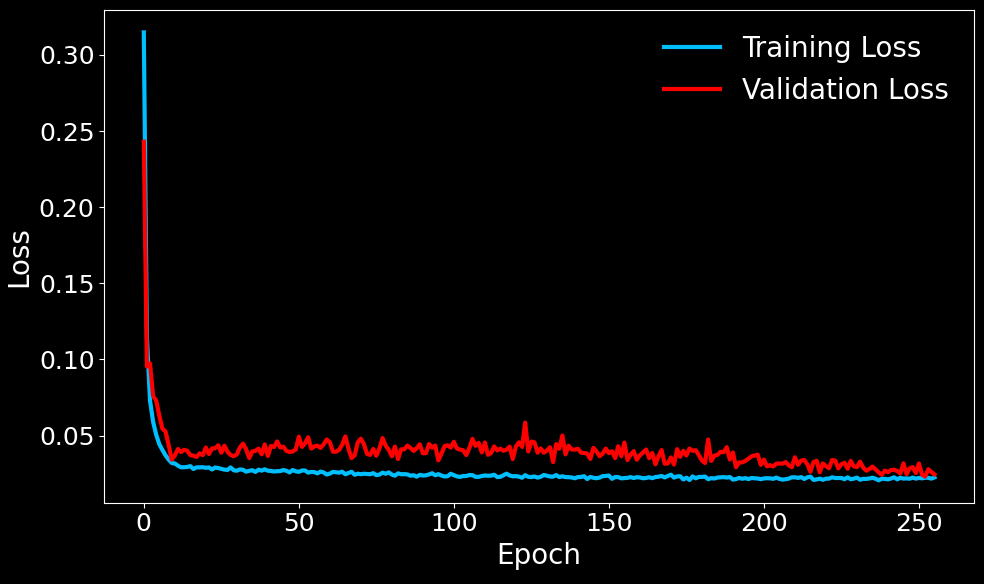

In [7]:
trainer.display_results()

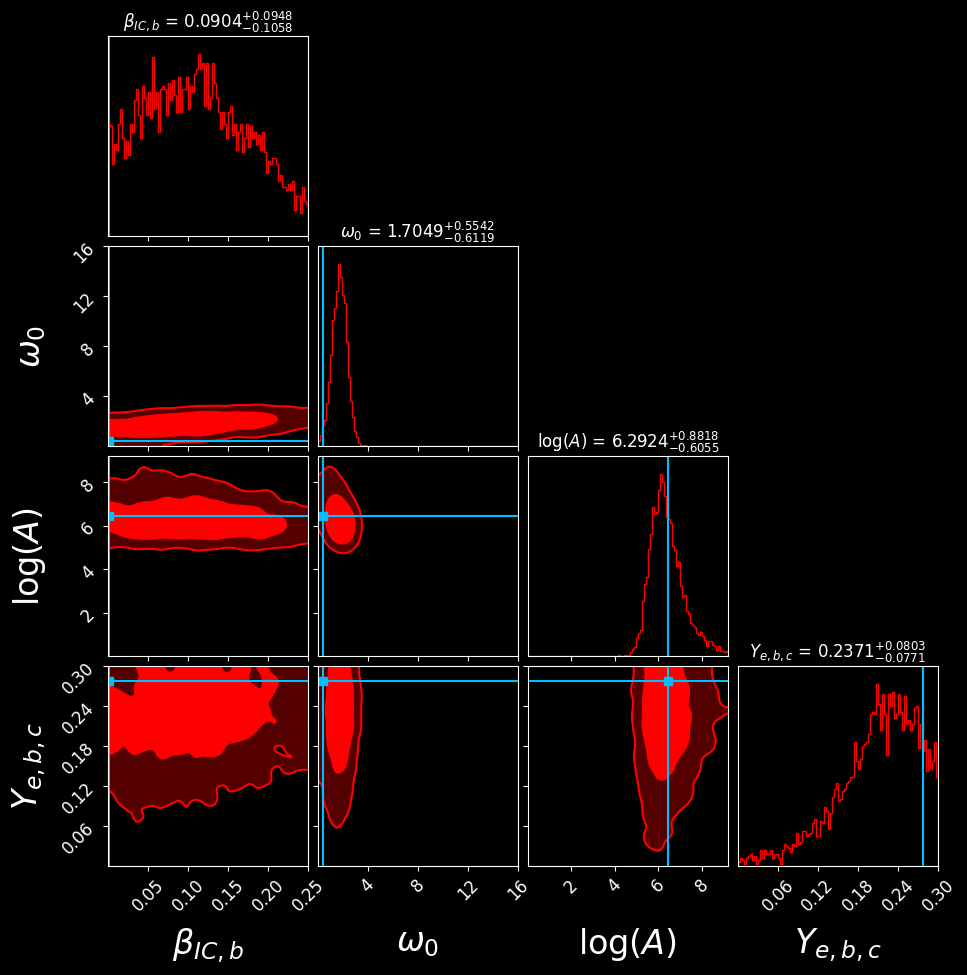

In [14]:
# trainer.val_loader.dataset.update_snr(20)
# signal, noisy_signal, params = trainer.val_loader.dataset.__getitem__(9)
# plot_candidate_signal(noisy_signal=noisy_signal/TEN_KPC, signal=signal/TEN_KPC, max_value=trainer.validation_dataset.max_strain, fname="plots/detected_signal.svg", background="black")
trainer.plot_corner(index=4, fname="plots/corner_plot.svg")

Number of parameters: 4


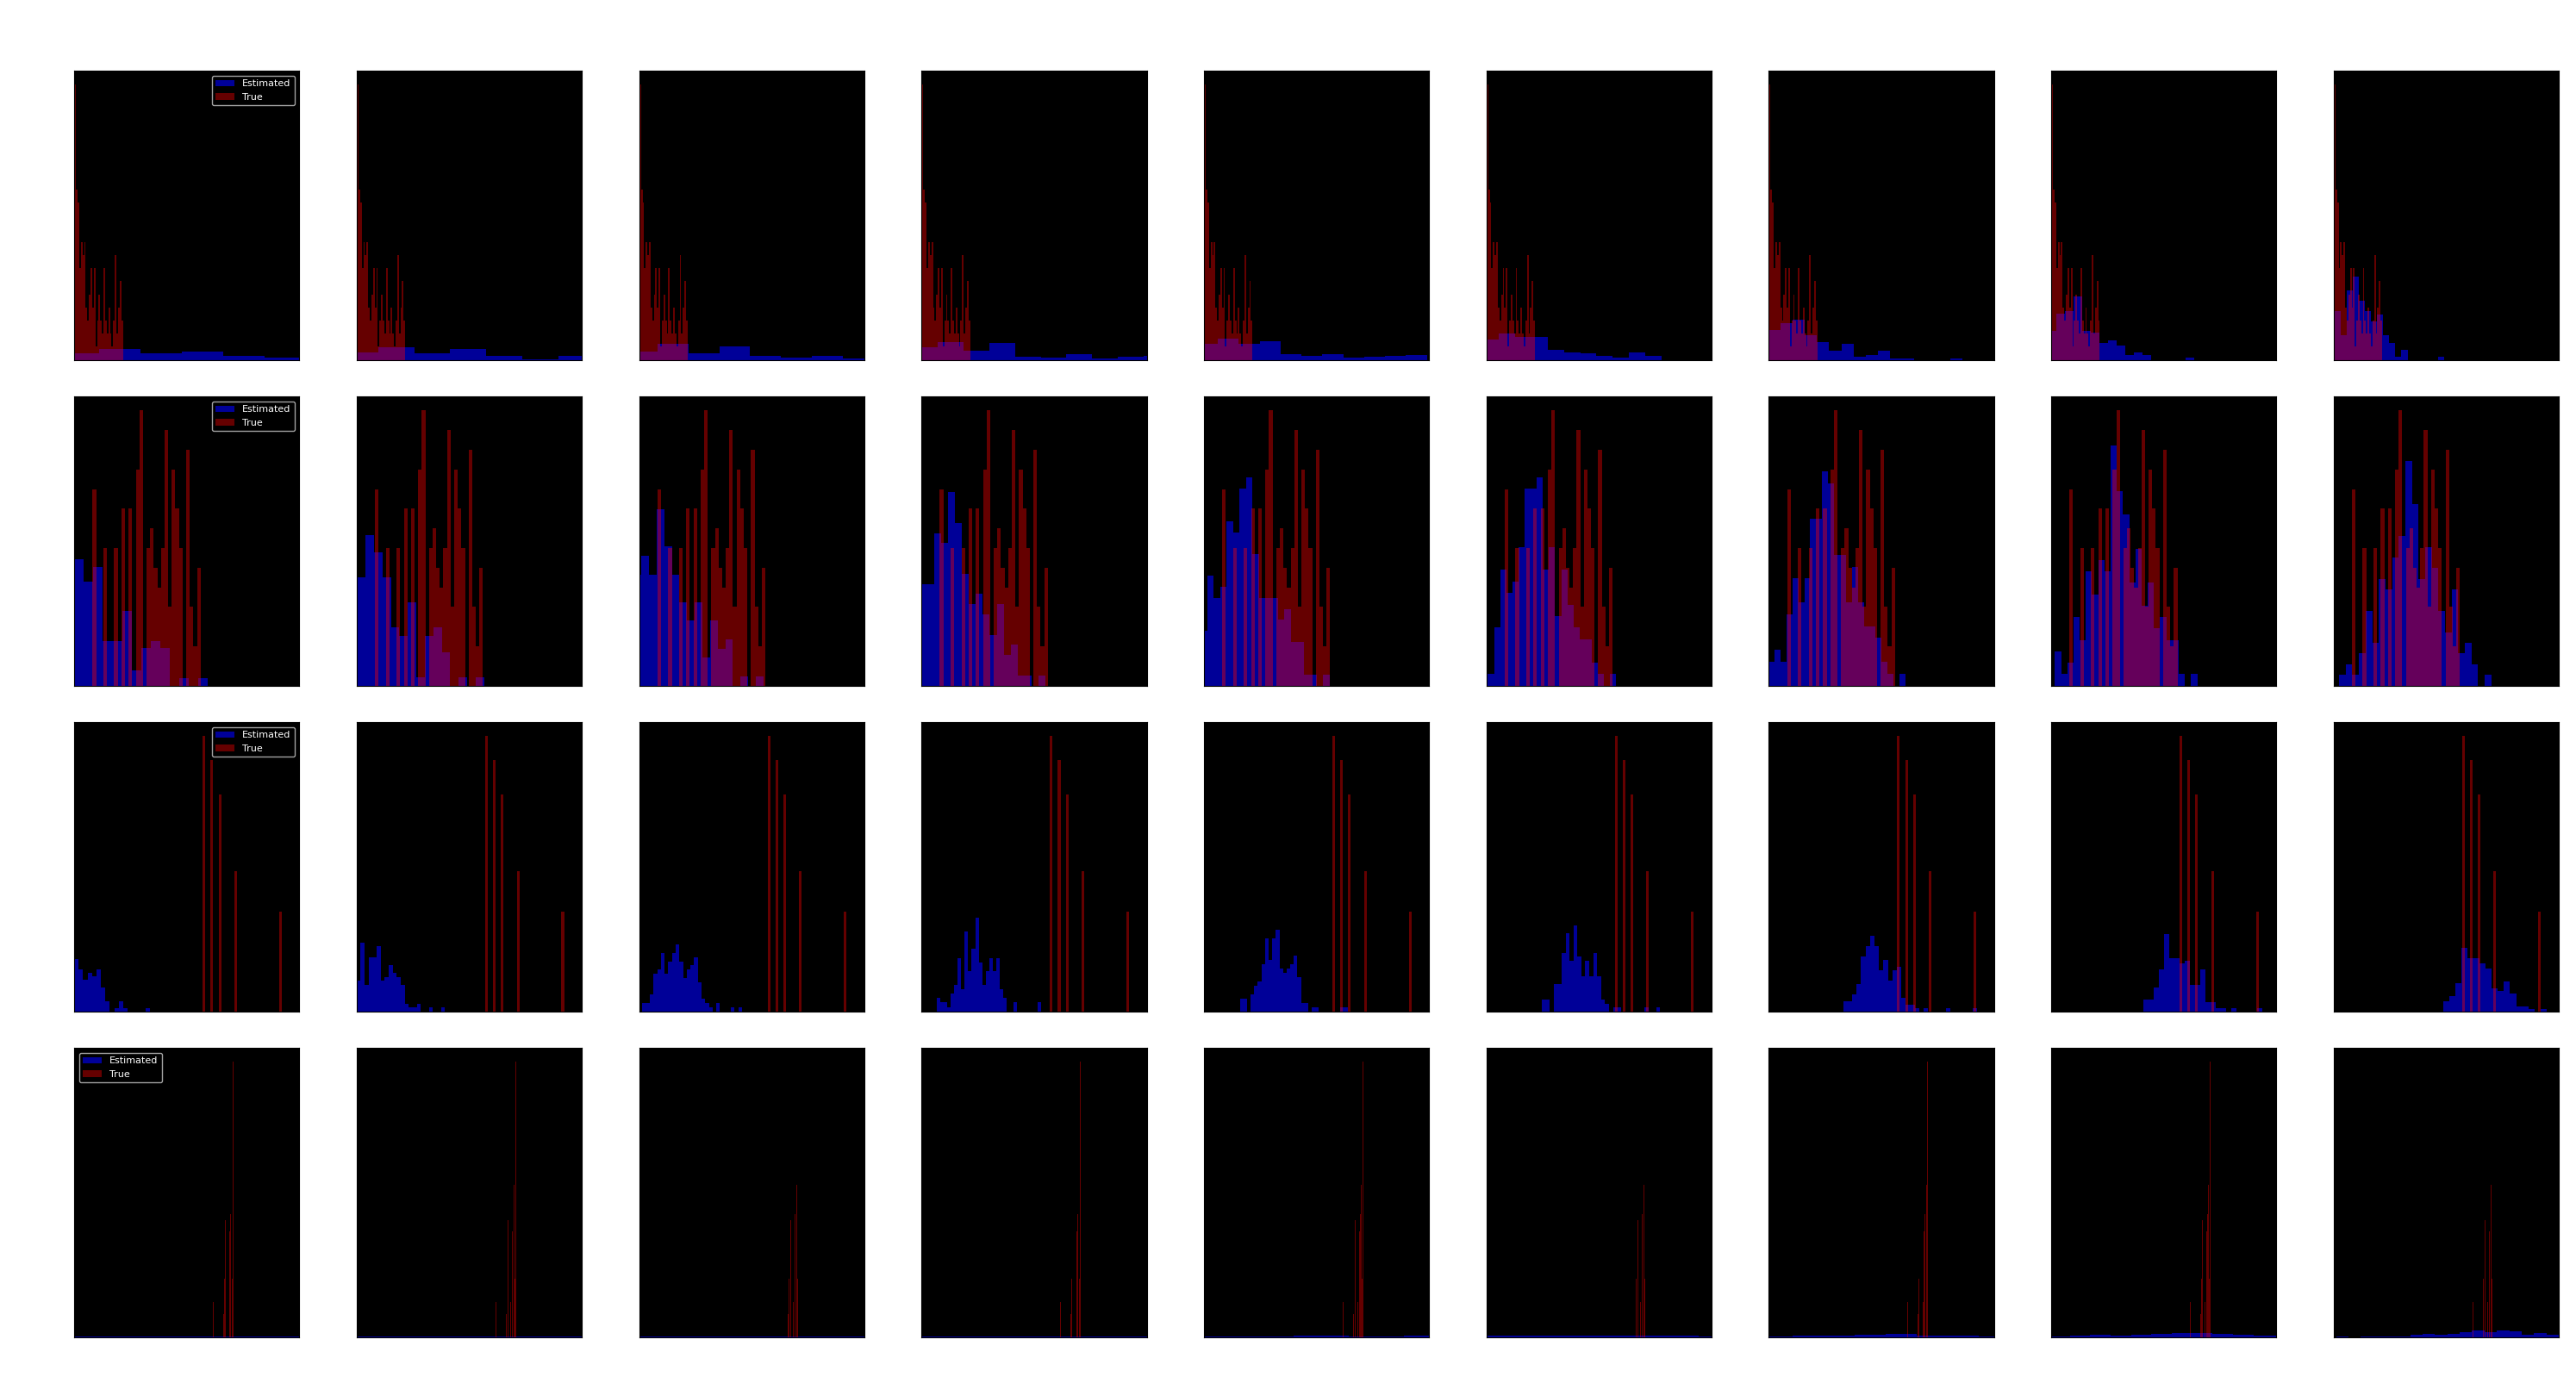

In [21]:
# Sampling - Parameter Estimation from Test Signals
val_dataset = trainer.val_loader.dataset

# Get true parameters and signals from validation set
n_test_samples = min(300, len(val_dataset))

# Detect number of parameters dynamically
sample_signal, sample_noisy, sample_params = val_dataset[0]
num_params = sample_params.shape[-1]
print(f"Number of parameters: {num_params}")

true_params = torch.zeros(n_test_samples, num_params, device=DEVICE)
test_signals = torch.zeros(n_test_samples, trainer.y_length, device=DEVICE)

for i in range(n_test_samples):
    clean_signal, noisy_signal, params = val_dataset[i]
    true_params[i] = params.squeeze()
    test_signals[i] = noisy_signal.squeeze()

# Start from noise in parameter space (independent 1D Gaussians)
x = torch.randn(n_test_samples, num_params, device=DEVICE)
n_steps = 8
time_steps = torch.linspace(0, 1.0, n_steps + 1)

# Store snapshots for visualization
snapshots = [x.detach().cpu().clone()]

# Flow the samples
for i in range(n_steps):
    x = trainer.flow.step(x, time_steps[i], time_steps[i + 1], test_signals)
    snapshots.append(x.detach().cpu().clone())

# Visualize 1D marginal distributions evolving
param_names = ['β', 'log(ω₀)', 'log(A)', 'Yₑ'] if num_params == 4 else ['Param 1', 'Param 2']

fig, axes = plt.subplots(num_params, n_steps + 1, figsize=(30, 4*num_params))
if num_params == 1:
    axes = axes.reshape(1, -1)

for param_idx in range(num_params):
    for step_idx, snapshot in enumerate(snapshots):
        ax = axes[param_idx, step_idx]
        
        # Plot histogram of this parameter dimension
        ax.hist(snapshot[:, param_idx].numpy(), bins=30, alpha=0.6, 
                color='blue', density=True, label='Estimated')
        ax.hist(true_params.cpu()[:, param_idx].numpy(), bins=30, alpha=0.4, 
                color='red', density=True, label='True')
        
        if param_idx == 0:
            ax.set_title(f't = {time_steps[step_idx]:.2f}', fontsize=12)
        if step_idx == 0:
            ax.set_ylabel(f'{param_names[param_idx]}\nDensity', fontsize=10)
        if param_idx == num_params - 1:
            ax.set_xlabel('Value', fontsize=10)

        if param_idx == 0:
            ax.set_xlim(0, 1)
        elif param_idx == 1:
            ax.set_xlim(0, 5)
        elif param_idx == 2:
            ax.set_xlim(0, 10)
        elif param_idx == 3:
            ax.set_xlim(0, 0.4)

        
        if step_idx == 0:
            ax.legend(fontsize=8)
        
        # Set consistent x-limits for toy data
        if num_params == 2:
            ax.set_xlim(-3, 3)

plt.suptitle('1D Marginal Distributions Flowing from Gaussian to Target', fontsize=16, y=1.00)
plt.tight_layout()
plt.savefig(f'plots/flow_evolution_1d_marginals.png', dpi=150, bbox_inches='tight')
plt.show()

# Generate posterior for a single signal
single_idx = 2
single_true_param = true_params[single_idx:single_idx+1]
single_signal = test_signals[single_idx:single_idx+1]

n_posterior_samples = 10000
posterior_samples = torch.randn(n_posterior_samples, num_params, device=DEVICE)
repeated_signal = single_signal.repeat(n_posterior_samples, 1)

# Flow the samples
n_steps_posterior = 20
time_steps_posterior = torch.linspace(0, 1.0, n_steps_posterior + 1)

for i in range(n_steps_posterior):
    posterior_samples = trainer.flow.step(posterior_samples, time_steps_posterior[i], 
                                   time_steps_posterior[i + 1], repeated_signal)

# # Visualize posterior - 1D marginals
# fig, axes = plt.subplots(1, num_params, figsize=(5*num_params, 4))
# if num_params == 1:
#     axes = [axes]

# for param_idx in range(num_params):
#     ax = axes[param_idx]
    
#     # Histogram of posterior samples
#     ax.hist(posterior_samples[:, param_idx].detach().cpu().numpy(), bins=50, 
#             alpha=0.6, color='blue', density=True, label='Posterior')
    
#     # True value as vertical line
#     ax.axvline(single_true_param[0, param_idx].cpu().numpy(), 
#                color='red', linestyle='--', linewidth=2, label='True value')
    
#     ax.axvline(posterior_samples[:, param_idx].mean().item(), 
#                color='green', linestyle='--', linewidth=2, label='Posterior mean')  
    
#     ax.set_xlabel(param_names[param_idx], fontsize=12)
#     ax.set_ylabel('Density', fontsize=12)
#     ax.legend(fontsize=10)
#     ax.grid(True, alpha=0.3)

# plt.suptitle('Posterior 1D Marginals for Single Signal', fontsize=14)
# plt.tight_layout()
# plt.savefig('plots/posterior_1d_marginals.png', dpi=150, bbox_inches='tight')
# plt.show()

# # Print statistics
# print(f"\nTrue parameter: {single_true_param.cpu().numpy().flatten()}")
# print(f"Posterior mean: {posterior_samples.mean(0).cpu().numpy()}")
# print(f"Posterior std:  {posterior_samples.std(0).cpu().numpy()}")